In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

TASK 1: DATA LOADING AND PREPROCESSING

In [ ]:
dataset, info = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.LAVD6J_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.LAVD6J_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
train_dataset = dataset['train']
test_dataset = dataset['test']

In [ ]:
print(f"\nDataset Info:")
print(f"Number of classes: {info.features['label'].num_classes}")
print(f"Class names: {info.features['label'].names}")
print(f"Train examples: {info.splits['train'].num_examples}")
print(f"Test examples: {info.splits['test'].num_examples}")



Dataset Info:
Number of classes: 3
Class names: ['rock', 'paper', 'scissors']
Train examples: 2520
Test examples: 372


In [ ]:
def preprocess_image(image, label):
    """
    Preprocess images:
    - Resize to 150x150
    - Normalize pixel values to [0, 1]
    - Convert label to integer
    """
    image = tf.image.resize(image, [150, 150])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [ ]:
train = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test = test_dataset.map(preprocess_image).batch(32)

TASK 2: Model Building

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

TASK 3: Model Training

In [11]:
history = model.fit(train, epochs=10, validation_data=test, verbose=1)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.6116 - loss: 0.7856 - val_accuracy: 0.7070 - val_loss: 0.6006
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9864 - loss: 0.0427 - val_accuracy: 0.8737 - val_loss: 0.4408
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9905 - loss: 0.0237 - val_accuracy: 0.7769 - val_loss: 1.3032
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9972 - loss: 0.0084 - val_accuracy: 0.7796 - val_loss: 1.0414
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9964 - loss: 0.0136 - val_accuracy: 0.8253 - val_loss: 0.9008
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9962 - loss: 0.0082 - val_accuracy: 0.7930 - val_loss: 0.8301
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.8038 - val_loss: 0.8054
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9990 - loss: 0.0023 - val_accuracy: 0.8306 - v

TASK 4: Model Evaluation

In [13]:
loss, acc = model.evaluate(test)
print(f"\nTest Accuracy: {acc*100:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.8243 - loss: 1.3931

Test Accuracy: 80.11%


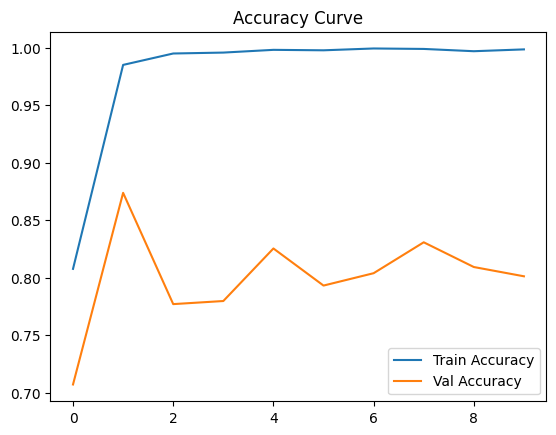

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

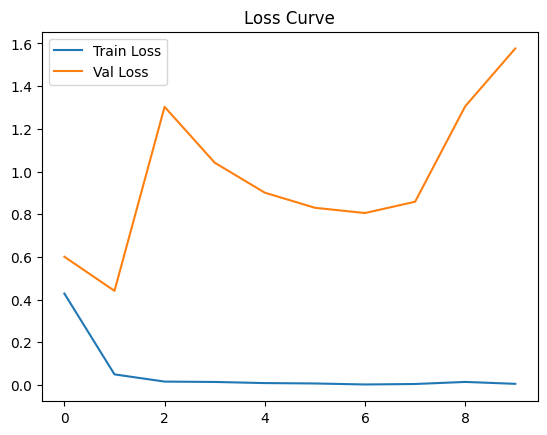

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()


✓ Predictions saved to 'predictions.png'


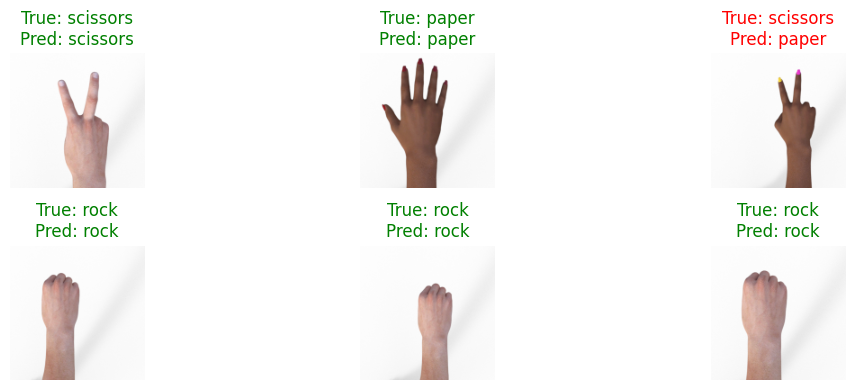

In [18]:
for imgs, labels in test.take(1):
    preds = model.predict(imgs[:6], verbose=0)
    plt.figure(figsize=(12, 4))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(imgs[i])
        pred_class = np.argmax(preds[i])
        true_class = labels[i].numpy()
        color = 'g' if pred_class == true_class else 'r'
        plt.title(f"True: {info.features['label'].names[true_class]}\n"
                 f"Pred: {info.features['label'].names[pred_class]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('predictions.png')
    print("✓ Predictions saved to 'predictions.png'")

Conceptual Explanation

Q1: Why do we use ReLU activation in CNN hidden layers?

ReLU (Rectified Linear Unit) is used in CNNs because:

It introduces non-linearity, allowing the model to learn complex patterns.

It is computationally fast compared to sigmoid/tanh.

It reduces the vanishing gradient problem because gradients do not shrink for positive values.

It helps CNNs train deeper networks efficiently.

Q2: Why is Softmax used in the output layer?

Softmax converts raw model outputs (logits) into probabilities that sum to 1.

In a 3-class classification (Rock, Paper, Scissors):

Softmax gives probability for each class

The class with highest probability = model prediction

Thus, softmax is ideal for multi-class classification.

Q3: Why is Categorical Crossentropy used as the loss function?

Categorical Crossentropy measures the difference between:

True labels (Rock/Paper/Scissors)

Predicted probability distribution (from Softmax)

It is the standard loss for multi-class classification because:

It heavily penalizes wrong confident predictions

It works directly with softmax outputs

It helps models converge faster and perform better

(If labels are integers, sparse_categorical_crossentropy is used.)

Q4: Suggest one method to reduce overfitting.

One effective method:

Use Data Augmentation

It artificially increases dataset size by slightly modifying images:

Random flip

Rotation

Zoom

Shift

Brightness changes

This helps the model generalize better.